In [ ]:
#   4_Substructure and Similarity Search using rdKit
## Substructure and similarity searches against database of our interest!


#http://rdkit.org/docs/Cookbook.html#highlight-a-substructure-in-a-molecule
Credits: hellerm2   

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.ipython_useSVG = True

# Highlight a Substructure in a Molecule

In [16]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')

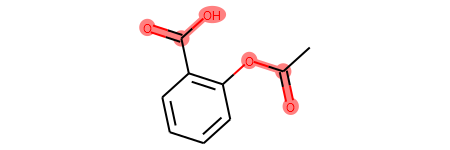

In [18]:
m

In [17]:
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


In [13]:
((3, 4, 5), (8, 9, 7))

((3, 4, 5), (8, 9, 7))

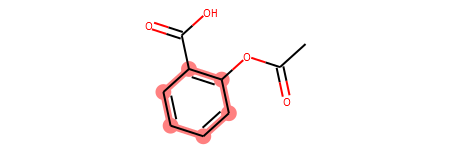

In [15]:
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [0,1,2,6,11,12]
m

# Substructure Search against database 

In [2]:
PandasTools.RenderImagesInAllDataFrames(images=True)

from IPython.core.display import HTML

def show(df):
    return HTML(df.to_html(notebook=True))

In [3]:
mydf = pd.read_pickle('./data/58_molobj.pkl')

,smiles,molport_id,mol
0,CC(=O)c1ccc(c(c1)OC)O,MolPort-000-000-274,
1,c1ccc2c(c1)CCC(C(=O)N2)N,MolPort-000-000-286,
2,c1cc2c(cc1N)NC(=O)CCC2,MolPort-000-000-287,
3,C1CCCC(CC1)(C(=O)O)N,MolPort-000-000-293,
4,Cc1cc(c2c(n1)CCCC2)N,MolPort-000-000-304,

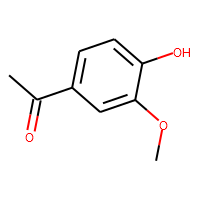
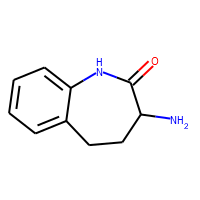
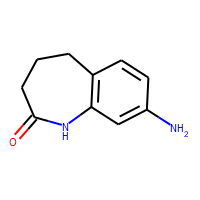
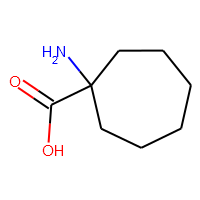
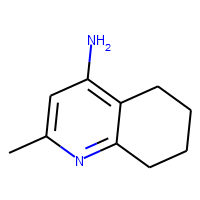

In [4]:
show(mydf.head())

In [5]:
query = Chem.MolFromSmiles('c1ccncc1')

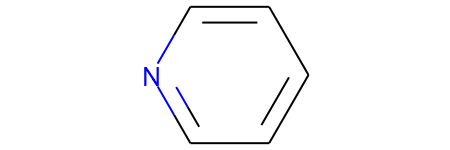

In [6]:
query

In [8]:
hits = mydf[mydf['mol'] >= query]

In [9]:
hits.shape

(4, 3)

,smiles,molport_id,mol
4,Cc1cc(c2c(n1)CCCC2)N,MolPort-000-000-304,
8,c1cc2c(ccnc2cc1Cl)N,MolPort-000-000-321,
13,c1cc2cc(ccc2nc1)CN,MolPort-000-000-390,
16,c1cc(cnc1)C(C(=O)O)N,MolPort-000-000-411,

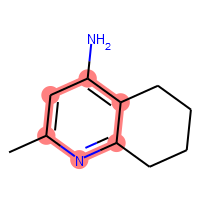
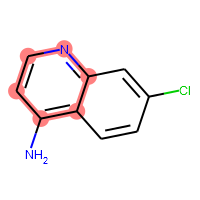
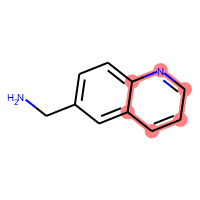
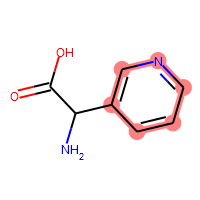

In [10]:
show(hits.head())

In [11]:
PandasTools.WriteSDF(hits, 'substruct_hits.sdf', molColName='mol', idName='molport_id')

# Similarity Searches

In [28]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [22]:
mydf['fp_mrgn_2'] = mydf['mol'].map(
                                      lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2)
                                      )

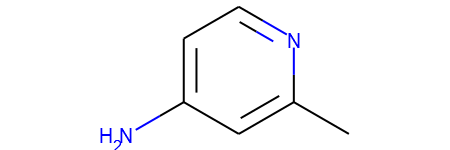

In [24]:
qmol = Chem.MolFromSmiles("Cc1cc(ccn1)N")
qmol

In [25]:
q_fp_mrgn_2 = AllChem.GetMorganFingerprintAsBitVect(qmol, 2)

In [29]:
mydf['fp_mrgn_2_sim'] = [DataStructs.TanimotoSimilarity(q_fp_mrgn_2, x) for x in mydf.fp_mrgn_2]

In [32]:
mydf.sort_values("fp_mrgn_2_sim", inplace=True, ascending=False)

In [34]:
top10_df = mydf.head(10)

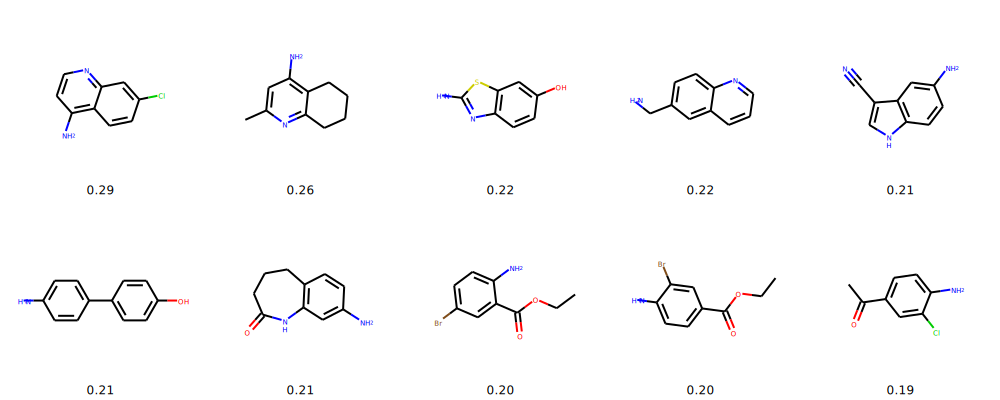

In [35]:
MolsToGridImage(top10_df.mol, molsPerRow=5, legends=["%.2f" % x for x in top10_df.fp_mrgn_2_sim])